#Comparison of Savings Across Top-Paying Cities: A Taxation and Cost of Living Analysis

This Python notebook aims to illustrate the divergent savings capabilities of software engineers residing and working in the highest-earning cities identified by Levels.fyi. By scrutinizing taxation rates, the cost of living, and income data, this analysis offers insights into the financial landscapes of various urban centers.

##Data Sources:

The data utilized in this analysis originates from the latest report published by Level FY (2023), a company renowned for analyzing employment trends and salary data across diverse industries and geographical regions. Specifically, we focus on the median salary of software engineers provided by Level.Fyi within first-world countries.

Rent costs are sourced from a dataset available on Kaggle (https://www.kaggle.com/datasets/mvieira101/global-cost-of-living), which the user scraped from the Numbeo website. Numbeo is a prominent crowdsourcing platform that tracks the cost of living in major cities worldwide.

Living expenses excluding rent and net income calculations are conducted by the author. The former data is derived from Numbeo, with their methodology outlined in the image below.

 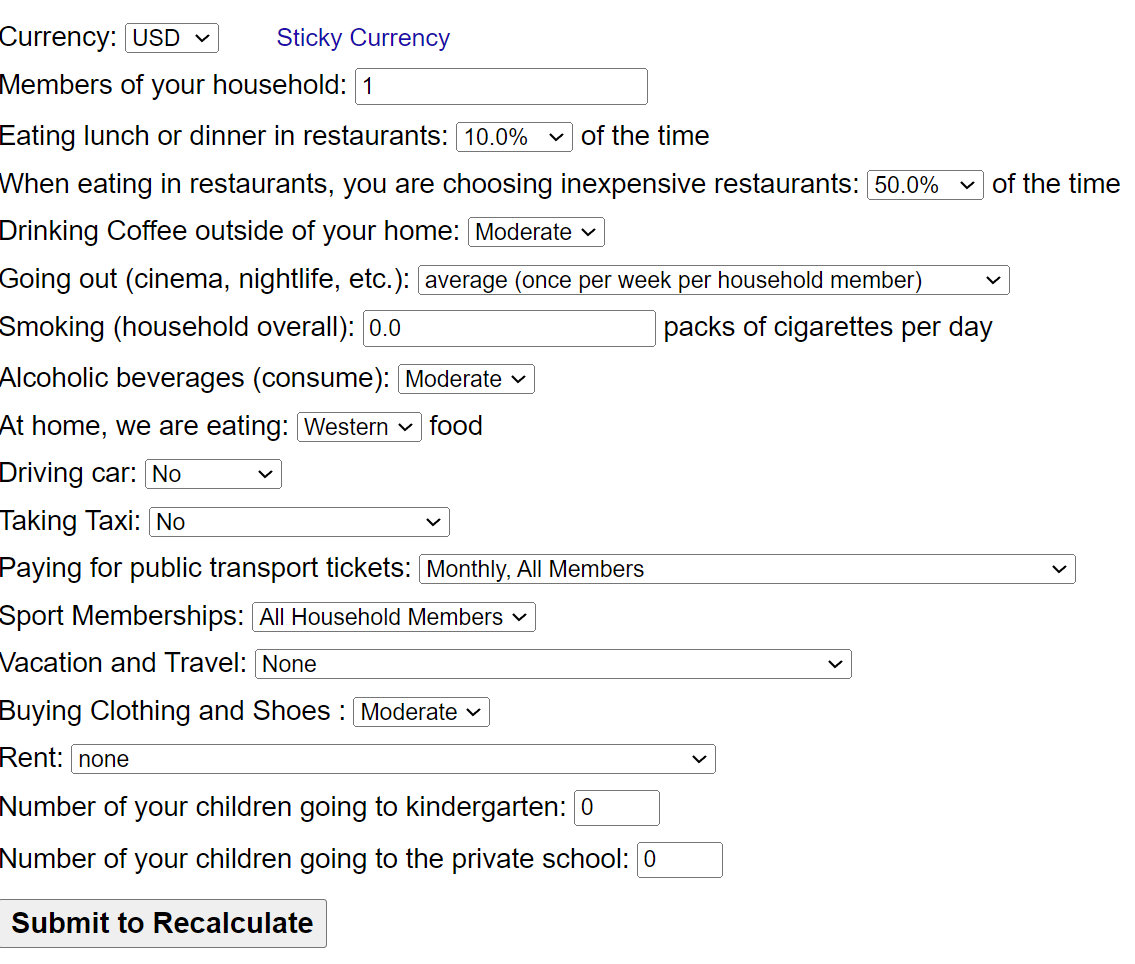

Lastly the net income calculations are based on respective country websites, considering a single individual without children under the age of 30.

Objective:

The primary aim of this analysis is to spotlight the substantial variations in savings potential among top-paying cities, accentuating the impact of taxation rates and the cost of living on financial outcomes. It is hoped that this work will provide readers with new perspectives or validate existing notions.








In [106]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Get the excel file where there is the gross/net income and the living expenses
file='/content/drive/MyDrive/cost_living.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
from google.colab import userdata
import os

# Get from google colab secret  username and key of kaggle to use the api
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [108]:
!kaggle datasets download -d mvieira101/global-cost-of-living

! unzip "global-cost-of-living.zip"n

Dataset URL: https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
License(s): CC0-1.0
global-cost-of-living.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open global-cost-of-living.zipn, global-cost-of-living.zipn.zip or global-cost-of-living.zipn.ZIP.


From the dataset donwloaded the only columns that are worth are the following:

*   city	Name of the city
*   country	Name of the country
* x48	Apartment (1 bedroom) in City Centre (USD)
* x49	Apartment (1 bedroom) Outside of Centre (USD)



In [109]:
import pandas as pd

dataset=pd.read_csv("cost-of-living.csv")
columns=['city', 'country','x48','x49']
dataset=dataset[columns]
cost_living=pd.read_excel(file)

In [110]:
# Rename the x48 and x49 columns
new_columns=['city', 'Country','1 bedroom Centre','1 bedroom Outside']
dataset.columns=new_columns
print(dataset.columns)
print(cost_living.columns)

Index(['city', 'Country', '1 bedroom Centre', '1 bedroom Outside'], dtype='object')
Index(['city', 'Country', 'Gross income per year (USD)',
       'Net income per year (USD)', 'Monthly cost (USD)'],
      dtype='object')


In [111]:
# Cities selected from the report

cities = [
    'San Francisco',
    'Seattle',
    'New York',
    'San Diego',
    'Portland',
    'Los Angeles',
    'Austin',
    'Boston',
    'Denver',
    'Washington',
    'Zurich',
    'Lausanne',
    'London',
    'Geneva',
    'Dublin',
    'Luxembourg',
    'Amsterdam',
    'Copenhagen',
    'Cambridge',
    'Berlin',
    'Tel Aviv-Yafo',
    'Vancouver',
    'Sydney',
    'Abu Dhabi',
    'Singapore',
    'Auckland'
]
print(len(cities))

26


In [112]:
# Merge the gross/net income and living expencess with the rent
filtered_dataset=dataset[dataset['city'].isin(cities)]
df=filtered_dataset.merge(cost_living, on=['city','Country'],how='inner')

# From the Kaggle dataset is missing San francisco
flag=df['city'].to_numpy()
missing=[c for c in cities if c not in flag]
print(missing)

['San Francisco']


In [113]:
# Calculate the saving and cost of living for each city considering renting a
# 1 bedroom apartament in inside/outside city center

df['Saving_Center']=df['Net income per year (USD)']-12*(
    df['Monthly cost (USD)']+df['1 bedroom Centre'])

df['Saving_Outside']=df['Net income per year (USD)']-12*(
    df['Monthly cost (USD)']+df['1 bedroom Outside'])

df['Cost_of_living_center']=12*(df['Monthly cost (USD)']+df['1 bedroom Centre'])
df['Cost_of_living_outside']=12*(df['Monthly cost (USD)']+df['1 bedroom Outside'])

df['taxes']=df['Gross income per year (USD)']-df['Net income per year (USD)']

print(df)


             city               Country  1 bedroom Centre  1 bedroom Outside  \
0        New York         United States           3851.51            2337.00   
1          London        United Kingdom           2311.99            1669.19   
2     Los Angeles         United States           2568.47            1952.66   
3      Washington         United States           2307.11            1882.14   
4       Singapore             Singapore           2660.73            1965.72   
5          Sydney             Australia           1657.31            1243.61   
6          Boston         United States           2691.67            1959.38   
7         Seattle         United States           2274.95            1827.50   
8          Berlin               Germany           1307.95             953.36   
9       San Diego         United States           2574.42            2041.30   
10         Denver         United States           1893.00            1601.38   
11      Vancouver                Canada 

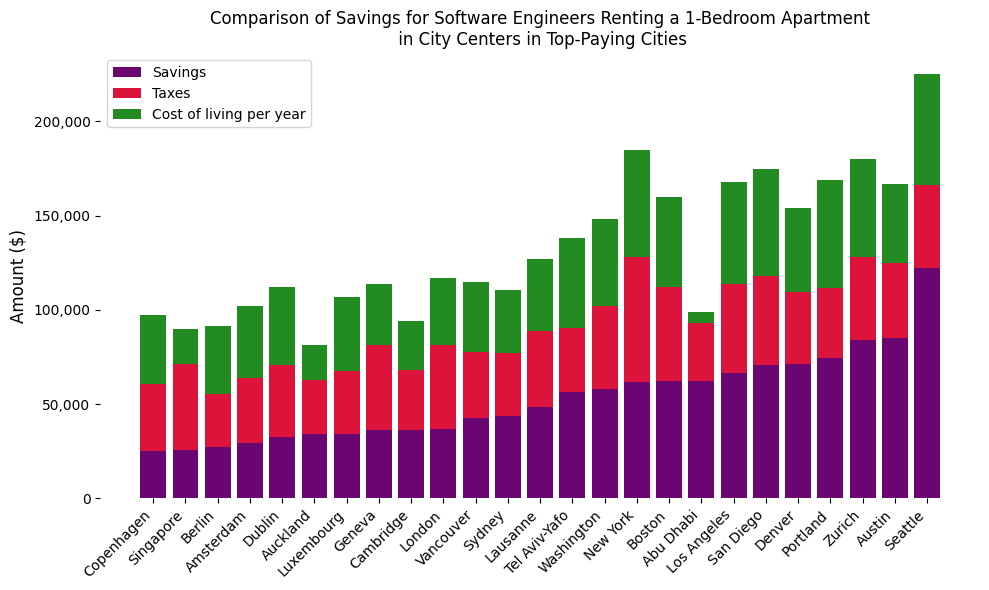

In [114]:
#------------------------- Plot savings in City center---------------------
import matplotlib.pyplot as plt

df = df.sort_values('Saving_Center', ascending=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Calculate the positions of the bars on the x-axis
x = range(len(df))

# Define new colors for the bars
savings_color = '#6A0572'
taxes_color = '#DC143C'
cost_color = '#228B22'

# Plotting the stacked bars
ax.bar(x, df['Saving_Center'], color=savings_color, label='Savings')
ax.bar(x, df['Cost_of_living_center'], color=taxes_color,
       label='Taxes', bottom=df['Saving_Center'])
ax.bar(x, df['taxes'], color=cost_color, label='Cost of living per year',
       bottom=df['Saving_Center'] + df['Cost_of_living_center'])

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(df['city'], rotation=45, ha='right')

# Set the y-axis label in dollars
ax.set_ylabel('Amount ($)', fontsize=12)


# Format the y-axis labels with a decimal point at the thousands position
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',.0f')))


# Set the chart title
ax.set_title('Comparison of Savings for Software Engineers Renting a 1-Bedroom Apartment\n in City Centers in Top-Paying Cities')

# Remove the background
ax.set_facecolor('none')
fig.set_facecolor('white')

# Add a legend
ax.legend()

# Remove the border around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust the layout to prevent label cropping
plt.tight_layout()

# Save the plot
plt.savefig('/content/plot_center.png', dpi=300)


# Show the plot
plt.show()


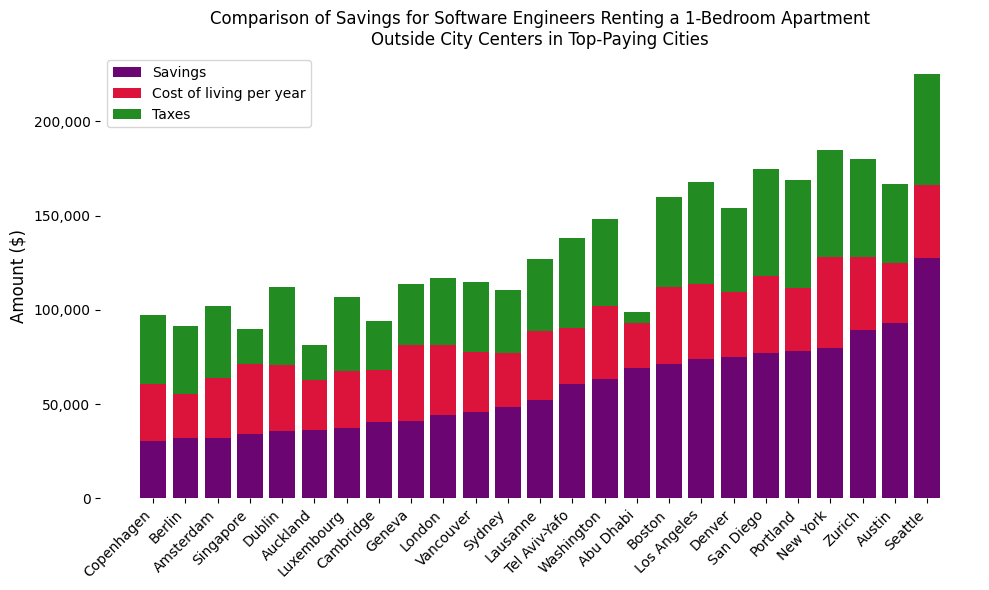

In [115]:
#------------------ Rent Outside the city center plot -----------------------

import matplotlib.pyplot as plt

df = df.sort_values('Saving_Outside', ascending=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Calculate the positions of the bars on the x-axis
x = range(len(df))

# Define new colors for the bars
savings_color = '#6A0572'
taxes_color = '#DC143C'
cost_color = '#228B22'

# Plotting the stacked bars
ax.bar(x, df['Saving_Outside'], color=savings_color, label='Savings')
ax.bar(x, df['Cost_of_living_outside'], color=taxes_color,
       label='Cost of living per year', bottom=df['Saving_Outside'])
ax.bar(x, df['taxes'], color=cost_color, label='Taxes',
       bottom=df['Saving_Outside'] + df['Cost_of_living_outside'])

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(df['city'], rotation=45, ha='right',)  # Adjust rotation and alignment here

# Set the y-axis label in dollars
ax.set_ylabel('Amount ($)', fontsize=12)

# Format the y-axis labels with a decimal point at the thousands position
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',.0f')))

# Set the chart title
ax.set_title('Comparison of Savings for Software Engineers Renting a 1-Bedroom Apartment\nOutside City Centers in Top-Paying Cities')


# Remove the background
ax.set_facecolor('none')
fig.set_facecolor('white')

# Add a legend
ax.legend()

# Remove the border around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust the layout to prevent label cropping
plt.tight_layout()

# Save the plot
plt.savefig('/content/plot_outside.png', dpi=300)

# Show the plot
plt.show()
